# Tutorial 03 in class exercises (randomization and bootstrapping)
## Goals
* Practice working through coding basics on your own
* Get a better intuition about when standard parametric t-tests and non-parametric approaches produce similar results and when they can diverge
* See the importance of plotting your data before you do anything else!
* Apply bootstrapping to some real EEG data to estimate confidence intervals

## First start by importing the packages you'll need. 
* Numpy, scipy, and matplotlib
* maybe set up a standard font as well if you want to get fancy

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

figureFont = {"fontname": "Arial", "size":"20"}

## Part I: Start with some data.
* First plot it
* Then compute summary stats (mean, std) for each data array
* Then compute the correlation coeffecient that relates the two arrays
* Then the t-value and p-value associated with the correlation. 
* Try to do this without copying from the in-class tutorial! Google the formulas if you don't remember them and then try to translate them into python (you can peek at in class tutorial if you get stuck, but its good practice to just hack it out)

[source of this famous data set: Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [2]:
d1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
d2 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 
               7.24, 4.26, 10.84, 4.82, 5.68])

## Plot data...scatter works well here
* First rule of data analysis...always plot your data first!

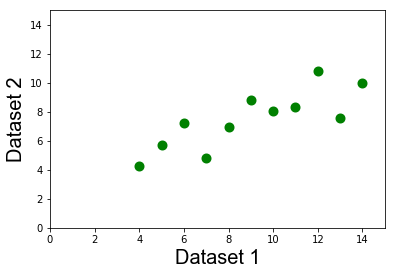

In [3]:
plt.scatter(d1,d2, color="g", marker="o", linewidths=4)
plt.xlabel("Dataset 1", **figureFont)
plt.ylabel("Dataset 2", **figureFont)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

## Compute mean, std of both data arrays
* Leave the output in the notebook so that we can come back and compare later

In [4]:
d1Mean = np.round(np.mean(d1), decimals = 2)
d1STD = np.round(np.std(d1), decimals = 2)

d2Mean = np.round(np.mean(d2), decimals = 2)
d2STD = np.round(np.std(d2), decimals = 2)

print("For d1, the mean is", d1Mean, "and the std is", d1STD)
print("For d2, the mean is", d2Mean, "and the std is", d2STD)

For d1, the mean is 9.0 and the std is 3.16
For d2, the mean is 7.5 and the std is 1.94


## Correlate the two data arrays, compute t-value and p-value associated with correlation coef

In [5]:
# Get the number of data points
N = len(d1)

# Calculate the correlation coefficient
d1d2Corr = np.corrcoef(d1,d2)[0,1]

# Calculate the t-value based on the correlation coefficient
d1d2Tval = (d1d2Corr * np.sqrt(N - 2)) / np.sqrt(1 - d1d2Corr ** 2)

# Calculate the p-value based on the t-value
d1d2Pval = (2 * (1 - stats.t.cdf(d1d2Tval, N - 1)))

print("The correlation coefficient is", np.round(d1d2Corr, decimals=3))
print("The t-value is", np.round(d1d2Tval, decimals=3))
print("The p-value is", np.round(d1d2Pval, decimals=3))

The correlation coefficient is 0.816
The t-value is 4.241
The p-value is 0.002


## Now use randomization testing to eval the reliability of the estimated p-value. 

<div class="alert alert-info">
Before you run this procedure, you should have a pretty good idea about how the standard p-value will compare with the p-value that you estimate using randomization. Make a prediction!
</div>

In [6]:
# We'll repeat 5,000 times
numRepeats = 5000

# Set up new variables containing varying amounts of 0s
randCorr = np.zeros(numRepeats)
randTval = np.zeros(numRepeats)
randVals1 = np.zeros(N)
randVals2 = np.zeros(N)

# Loop through our 5,000 iterations
for i in np.arange(numRepeats):
                     
    # Loop through the number of datapoints (here, 0-10)
    for j in np.arange(N):
        # If a random number between 0 and 1 is less than 0.5...
        if np.random.rand(1) < 0.5:
            randVals1[j] = d1[j]   # First list pick from d1
            randVals2[j] = d2[j]   # Second list pick from d2
        # If the random number is greater than 0.5...
        else:
            randVals1[j] = d2[j]   # First list pick from d2
            randVals2[j] = d1[j]   # Second list pick from d1
    
    # Now calculate corr coef and t-value for each iteration
    # And fill our lists of 0s above with the values
    randCorr[i] = np.corrcoef(randVals1,randVals2)[0,1]
    randTval[i] = (randCorr[i]*np.sqrt(N-2)) / np.sqrt(1-randCorr[i]**2)

randPval = 2 * (1 - (np.sum(d1d2Tval > randTval) / numRepeats))
print("P-value from randomization:",np.round(randPval,3))
print("P-value from parametric test:",np.round(d1d2Pval,3))

P-value from randomization: 0.031
P-value from parametric test: 0.002


## Part II: Here is a second data set (actually, its another part of the Anscombe data set...but lets pretend like its an entirely new data set)

In [7]:
d3 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
d4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

## Break the first rule of data analysis, and BEFORE you plot the data, compute the mean and std of these two arrays
* What do you notice when you compare them to the mean and std of the arrays in the first part of the exercises?

In [8]:
d3Mean = np.round(np.mean(d3), decimals = 2)
d3STD = np.round(np.std(d3), decimals = 2)

d4Mean = np.round(np.mean(d4), decimals = 2)
d4STD = np.round(np.std(d4), decimals = 2)

print("For d3, the mean is", d3Mean, "and the std is", d3STD)
print("For d4, the mean is", d4Mean, "and the std is", d4STD)

# They are exactly the same as the previous means and stds, except that
# d1 here is pretty funky. I would expect the randomization test to 
# turn out a much higher p-value.

For d3, the mean is 9.0 and the std is 3.16
For d4, the mean is 7.5 and the std is 1.94


## Based only on your comparison of the mean and std of the data from Part I and Part II, what is your prediction about the effects of randomization testing on this new data set? 
* Will the randomization based p-value be similar to the standard p-value as it was in the example above?

## Ok - now plot the data

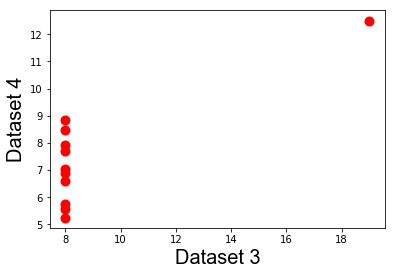

Yep, that's a pretty effed up dataset


In [9]:
plt.scatter(d3,d4, color="r", marker="o", linewidths=4)
plt.xlabel("Dataset 3", **figureFont)
plt.ylabel("Dataset 4", **figureFont)
plt.show()

print("Yep, that's a pretty effed up dataset")

## Based on this, what do you think is going to happen when we compare the output from a parametric test and a radomization test?
* Remember that the mean and the std of the data sets in Part I and Part II are identical...
* Compute correlation coef, and do randomization testing

In [10]:
# The results will find almost the same value every time we randomize,
# because d1 is filled with the same number. We'll just keep resampling
# the number 8 over and over again.

# Get the number of data points
N = len(d3)

# Calculate the correlation coefficient
d3d4Corr = np.corrcoef(d3,d4)[0,1]

# Calculate the t-value based on the correlation coefficient
d3d4Tval = (d3d4Corr * np.sqrt(N - 2)) / np.sqrt(1 - d3d4Corr ** 2)

# Calculate the p-value based on the t-value
d3d4Pval = (2 * (1 - stats.t.cdf(d3d4Tval, N - 1)))

print("The correlation coefficient is", np.round(d3d4Corr, decimals=3))
print("The t-value is", np.round(d3d4Tval, decimals=3))
print("The p-value is", np.round(d3d4Pval, decimals=3))

print("\nThese are still the same numbers as before!")

The correlation coefficient is 0.817
The t-value is 4.243
The p-value is 0.002

These are still the same numbers as before!


## Compare the correlation coeffecients to those from Part I.
* So far, everything is pretty much the same between the data sets (same mean/std/corr coef)
* So should randomization testing yield about the same results? Try it...

In [11]:
# Now we evaluate the reliability of that p-value. It's probably going to
# be QUITE reliable! So reliable that we get it nearly every time...

# We'll repeat 5,000 times
numRepeats = 5000

# Set up new variables containing varying amounts of 0s
randCorr2 = np.zeros(numRepeats)
randTval2 = np.zeros(numRepeats)
randVals3 = np.zeros(N)
randVals4 = np.zeros(N)

# Loop through our 5,000 iterations
for i in np.arange(numRepeats):
                     
    # Loop through the number of datapoints (here, 0-10)
    for j in np.arange(N):
        # If a random number between 0 and 1 is less than 0.5...
        if np.random.rand(1) < 0.5:
            randVals3[j] = d3[j]   # First list pick from d3
            randVals4[j] = d4[j]   # Second list pick from d4
        # If the random number is greater than 0.5...
        else:
            randVals3[j] = d4[j]   # First list pick from d4
            randVals4[j] = d3[j]   # Second list pick from d3
    
    # Now calculate corr coef and t-value for each iteration
    # And fill our lists of 0s above with the values
    randCorr2[i] = np.corrcoef(randVals3,randVals4)[0,1]
    randTval2[i] = (randCorr2[i]*np.sqrt(N-2)) / np.sqrt(1-randCorr2[i]**2)

randPval2 = 2 * (1 - (np.sum(d3d4Tval > randTval2) / numRepeats))
print("P-value from randomization:",np.round(randPval2,3))
print("P-value from parametric test:",np.round(d3d4Pval,3))

print("\nWhat a surprise; our p-value was a little too reliable.")

P-value from randomization: 0.386
P-value from parametric test: 0.002

What a surprise; our p-value was a little too reliable.


## Part III: Load in the second EEG data set from last week (eeg_data01.npz). 
* Pull out the data, sr, and tx arrays

In [12]:
# load the data...
eeg = np.load('eeg_data01.npz')

# Pull out the following arrays
data = eeg["data"] # trials by timepoints
sr = eeg["sr"] # sample rate 
tx = eeg["tx"] # time

print("The shape of the data is:", data.shape) 
print("\nI.e.",data.shape[0],"rows (trials) and",data.shape[1],"columns (timepoints)")

The shape of the data is: (1600, 4102)

I.e. 1600 rows (trials) and 4102 columns (timepoints)


## Below is a vector that labels each trial as coming from experimental conditions 1,2,3,4

In [13]:
# Get number of trials (rows)
N = data.shape[0]
print("The number of total trials is:", N)

# Divide the total trials by 4 different conditions
trialsPerCond = int(N/4)
print("The number of trials per condition is:", trialsPerCond)

# Create a vector of condition labels (this makes a single column with
# 1600 rows, incrementing from 1 to 4 after every 400 values)
cond = np.hstack((np.ones(trialsPerCond), np.ones(trialsPerCond)*2, 
                  np.ones(trialsPerCond)*3, np.ones(trialsPerCond)*4))

The number of total trials is: 1600
The number of trials per condition is: 400


## Now average the data from condition 2, avg the data from condition 3, and plot against the time axis (tx) - we're going to ignore conditions 1 and 4

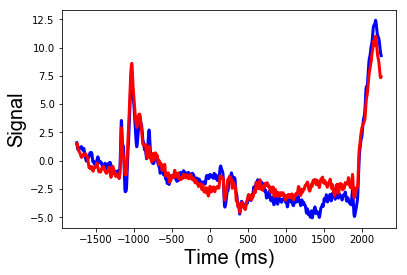

In [14]:
# Pull out condition 2 and condition 3
cond2 = data[cond == 2]
cond3 = data[cond == 3]

# Find the average across rows for each column
# (Collapses to a single row; axis = 1 would collapse to a single column)
avgCond2 = np.mean(cond2, axis = 0)
avgCond3 = np.mean(cond3, axis = 0)

# Plot our two conditions across time
plt.plot(tx, avgCond2, color = "b", linewidth=3) # Plot condition 2
plt.plot(tx, avgCond3, color = "r", linewidth=3) # Plot condition 3
plt.xlabel("Time (ms)", **figureFont)
plt.ylabel("Signal", **figureFont)
plt.show()

## Next do a t-test for related samples comparing the responses in conditions 2 and 3 at each point in time. Note - you can do this all in one line of code!

In [15]:
tTest = stats.ttest_rel(cond2, cond3)

## now plot the averages in one plot, and then right below that make another plot with the t-values. Keep in mind that with this many degrees of freedom, a t-value of approx 1.9 is significant at the magic 0.05 level (or 1.68 one-tailed). So put some horizontal lines on the plot at 1.9 and -1.9. You'll see some pretty impressive t-values in the data!

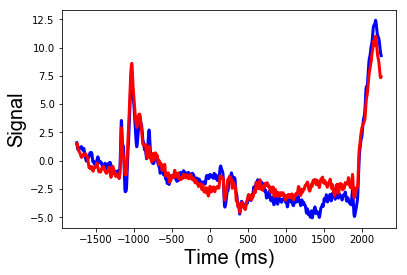

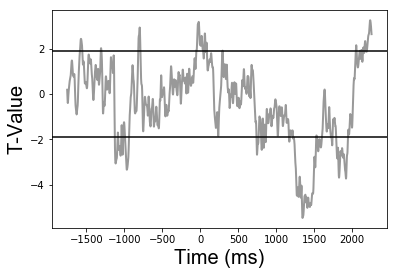

In [16]:
# Recreate the same plot above
plt.plot(tx, avgCond2, color = "b", linewidth=3) # Plot condition 2
plt.plot(tx, avgCond3, color = "r", linewidth=3) # Plot condition 3
plt.xlabel("Time (ms)", **figureFont)
plt.ylabel("Signal", **figureFont)
plt.show()

# And plot the t-values!
plt.plot(tx, tTest.statistic, color = "0.60", linewidth = 2)
plt.axhline(1.9, color = "k") # Add horizontal line at specified Y point
plt.axhline(-1.9, color = "k") # Add horizontal line at specified Y point
plt.xlabel("Time (ms)", **figureFont)
plt.ylabel("T-Value", **figureFont)
plt.show()

## You should see that there is a significant difference at many timepoints...Now figure out how robust those effects are by applying bootstrapping 
* To do this, you might first create two 400 x 4102 matrices, one with data from all trials of condition 2, and one with data from all trials of condition 3
* Then resample 400 trials, with replacement, from each data matrix and then do the t-test. 
* try generating a set of 400 values with repeating numbers that you can use for a row index into the data matrices
* repeat and then compute CIs of the t-value
* how often do the CIs for the t-value overlap with 0???
* note - this can take a while, so start with 50 bootstraps and then increase as compute time allows

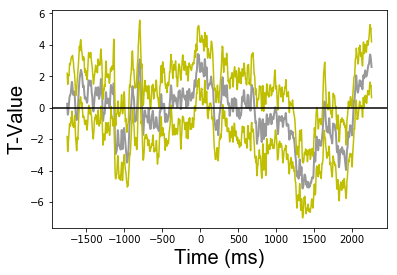

In [24]:
# Matrices from condition 2 and condition 3, created earlier
cond2
cond3

# Get number of trials (400)
N = len(cond2)

# Number of bootstraps
numBoots = 50 # That's a lotta boots

# Create empty variable to fill with t-values
tValBoots = np.zeros((numBoots,cond2.shape[1])) # Why does this need double parentheses?

# Each loop runs a single bootsrap
for i in np.arange(numBoots):
    # Create ints from 0 to 400, with a length of 400
    randRef1 = np.random.randint(N, size = N)
    randRef2 = np.random.randint(N, size = N)
    
    # Use those randomly generated numbers to pull from our conditions
    temp1 = cond2[randRef1]
    temp2 = cond3[randRef2]
    
    # Do the t-test
    tTestTemp = stats.ttest_rel(temp1, temp2)
    
    # Fill the empty variable with t-values
    tValBoots[i,:] = tTestTemp.statistic

# Get confidence intervals (pulling out percentiles)
confInt = np.percentile(tValBoots, [2.5, 97.5], axis = 0)

# What does it look like?
plt.plot(tx, np.mean(tValBoots, axis = 0), color = "0.6", linewidth = 2)
plt.plot(tx, confInt[0,], color = "y")
plt.plot(tx, confInt[1,], color = "y")
plt.xlabel("Time (ms)", **figureFont)
plt.ylabel("T-Value", **figureFont)
plt.axhline(0, color = "k")
plt.show()


## How do things compare?